In [6]:
import os, inspect
main_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))) # script directory
print(main_dir)
%load_ext autoreload
%autoreload 2
from RGCPD import RGCPD
from RGCPD import BivariateMI
import class_BivariateMI

/Users/semvijverberg/surfdrive/Scripts/RGCPD
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
main_dir

'/Users/semvijverberg/surfdrive/Scripts/RGCPD'

In [7]:
# define input: list_of_name_path = [('TVname', 'TVpath'), ('prec_name', 'prec_path')]
path_test = os.path.join(main_dir, 'data')
list_of_name_path = [(3, os.path.join(path_test, 'tf5_nc5_dendo_80d77.nc')),
                    ('sst', os.path.join(path_test,'sst_1979-2018_2.5deg_Pacific.nc'))]

# define analysis:
list_for_MI = [BivariateMI(name='sst', func=class_BivariateMI.corr_map, 
                          alpha=.01, FDR_control=True, 
                          distance_eps=700, min_area_in_degrees2=5)]

rg = RGCPD(list_of_name_path=list_of_name_path,
           list_for_MI=list_for_MI,
           path_outmain=os.path.join(main_dir,'data'))

sorting latitude
Plotting Corr maps xrclustered, split 0, lag 0

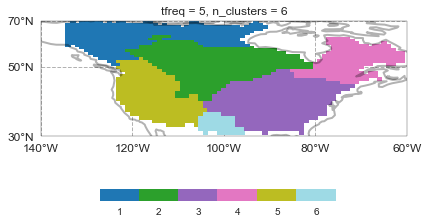

In [8]:
# if TVpath contains the xr.DataArray xrclustered, we can have a look at the spatial regions.
rg.plot_df_clust()

In [9]:
rg.pp_precursors(detrend=True, anomaly=True, selbox=None)

Loaded pre-processed data of sst



### Post-processing Target Variable

In [10]:
rg.pp_TV()

sorting latitude
original tfreq of imported response variable is converted to desired tfreq


In [11]:
rg.traintest?

Signature: rg.traintest(method: str = None, seed=1, kwrgs_events=None)
Docstring:
Splits the training and test dates, either via cross-validation or
via a simple single split.
agrs:
'method'        : str referring to method to split train test, see
                  options for method below.
seed            : the seed to draw random samples for train test split
kwrgs_events    : dict needed to create binary event timeseries, which
                  is used to create stratified folds.
                  See func_fc.Ev_timeseries? for more info.

Options for method:
(1) random{int}   :   with the int(ex['method'][6:8]) determining the amount of folds
(2) ran_strat{int}:   random stratified folds, stratified based upon events,
                      requires kwrgs_events.
(3) leave{int}    :   chronologically split train and test years.
(4) split{int}    :   split dataset into single train and test set
(5) no_train_test_split
# Extra: RV events settings are needed to make balanced traintest

In [12]:
rg.traintest(method='random5')

In [13]:
rg.calc_corr_maps() 


sst - calculating correlation maps
Progress traintest set 100%, trainsize=(288dp, 80%)



Plotting Corr maps sst, split 0, lag 1

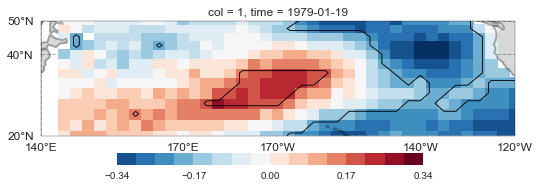

In [14]:
rg.plot_maps_corr()

In [15]:
rg.cluster_list_MI()

Plotting Corr maps sst_labels_init, split 4, lag 1

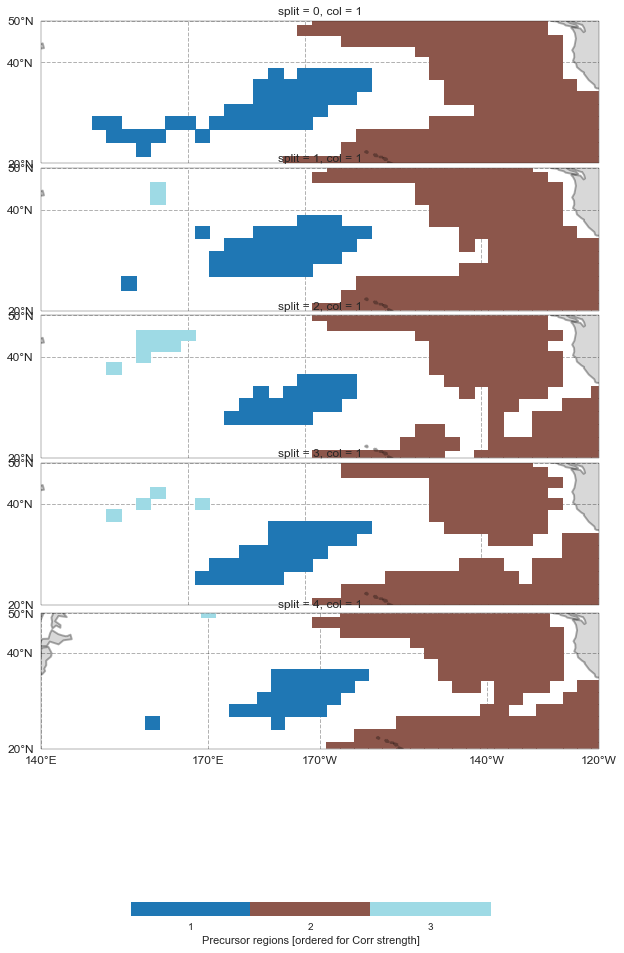

In [16]:
rg.quick_view_labels(median=False) 

In [17]:
rg.get_ts_prec()


Getting MI timeseries
aggregating precursors to 10 days
There are [2, 3, 3, 3, 3] regions in total (list of different splits)


In [18]:
rg.df_data

3ts  1..1..sst  1..2..sst  1..3..sst  TrainIsTrue  RV_mask
0 1979-01-19 -2.848077   0.508367  -0.064467        NaN         True    False
  1979-01-29 -5.472298   0.259494  -0.035518        NaN         True    False
  1979-02-08 -8.489348   0.469245  -0.246582        NaN         True    False
  1979-02-18 -5.528559   1.075248  -0.362828        NaN         True    False
  1979-02-28 -0.377483   0.986379  -0.264269        NaN         True    False
...                ...        ...        ...        ...          ...      ...
4 2018-11-15 -7.230792  -0.704347   0.667602   0.979816         True    False
  2018-11-25 -3.207582  -0.386664   0.752094   1.076736         True    False
  2018-12-05 -2.788919  -0.493094   0.667303   0.551033         True    False
  2018-12-15  2.139915  -0.245120   0.516568   0.202181         True    False
  2018-12-25  1.974430  -0.253291   0.350955   0.130349         True    False

[7000 rows x 6 columns]

In [19]:
rg.PCMCI_df_data()

Progress causal inference - traintest set 100%

In [20]:
rg.PCMCI_get_links(alpha_level=.05)

/Users/semvijverberg/miniconda3/envs/RGCPD/lib/python3.7/site-packages/tigramite-4.2.0.3-py3.7-macosx-10.9-x86_64.egg/tigramite/pcmci.py:1443: UserWarning: return_significant_parents is DEPRECATED: use return_significant_links() instead and check updated key names.
  warnings.warn("return_significant_parents is DEPRECATED: use "



Plotting all fields significant at alpha_level_tig, while conditioning on parents that were found in the PC step
Plotting Corr maps sst_labels, split 0, lag sst_labels_tigr

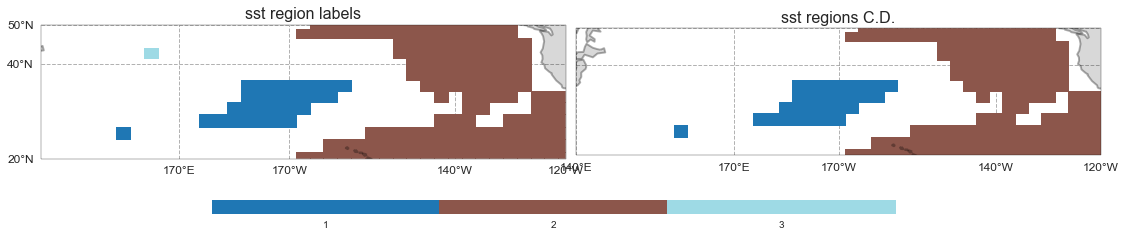

Plotting Corr maps sst_labels, split 0, lag sst_labels_tigr

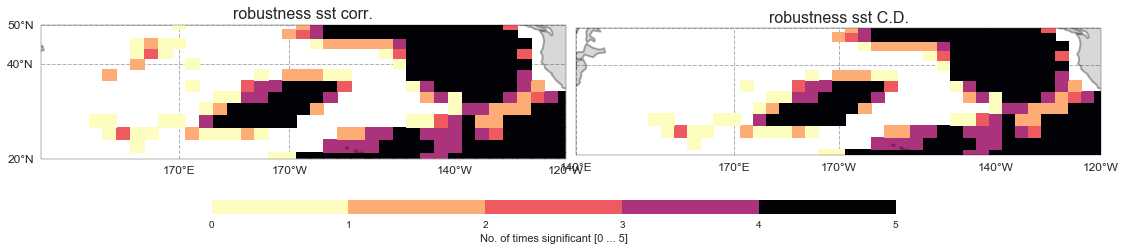


Plotting all fields significant at alpha_level_tig, while conditioning on parents that were found in the PC step
Plotting Corr maps sst_corr_and_tigr, split 0, lag sst_corr_tigr

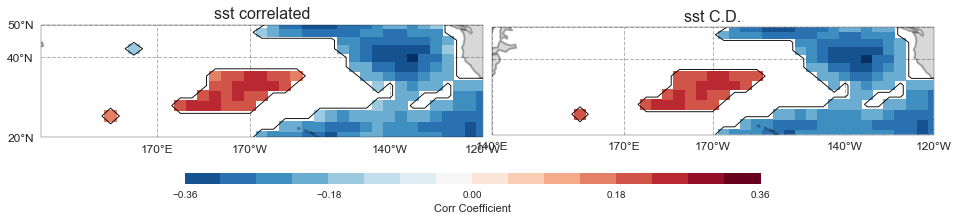

In [21]:
rg.plot_maps_sum()

In [22]:
rg.df_data

3ts  1..1..sst  1..2..sst  1..3..sst  TrainIsTrue  RV_mask
0 1979-01-19 -2.848077   0.508367  -0.064467        NaN         True    False
  1979-01-29 -5.472298   0.259494  -0.035518        NaN         True    False
  1979-02-08 -8.489348   0.469245  -0.246582        NaN         True    False
  1979-02-18 -5.528559   1.075248  -0.362828        NaN         True    False
  1979-02-28 -0.377483   0.986379  -0.264269        NaN         True    False
...                ...        ...        ...        ...          ...      ...
4 2018-11-15 -7.230792  -0.704347   0.667602   0.979816         True    False
  2018-11-25 -3.207582  -0.386664   0.752094   1.076736         True    False
  2018-12-05 -2.788919  -0.493094   0.667303   0.551033         True    False
  2018-12-15  2.139915  -0.245120   0.516568   0.202181         True    False
  2018-12-25  1.974430  -0.253291   0.350955   0.130349         True    False

[7000 rows x 6 columns]

In [23]:
rg.df_links

0      1
0 3ts        False   True
  1..1..sst   True  False
  1..2..sst   True  False
1 3ts        False   True
  1..1..sst   True  False
  1..2..sst   True   True
  1..3..sst  False  False
2 3ts        False   True
  1..1..sst   True  False
  1..2..sst   True  False
  1..3..sst  False  False
3 3ts        False   True
  1..1..sst   True  False
  1..2..sst   True  False
  1..3..sst  False  False
4 3ts        False   True
  1..1..sst   True  False
  1..2..sst   True  False
  1..3..sst  False  False

In [19]:
rg.store_df_PCMCI()

Data stored in 
/Users/semvijverberg/surfdrive/Scripts/RGCPD/data/3_80d77_10jun-19aug_lag0-0_random5s1/None_tau_0-1_conds_dim3_combin2_dt10.h5


In [24]:
rg.PCMCI_get_ParCorr_from_txt()

ValueError: could not convert string to float: '[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]'

In [21]:
rg.df_ParCorr_sum

,coeff mean,coeff min,coeff max,pval mean,pval max,ParCorr C.D.,ParCorr -,ParCorr (3 -1)
3 -1,0.2720,0.268,0.278,0.000000,0.0000,5,0,0
0..1..sst -1,0.1164,0.079,0.148,0.004332,0.0181,4,0,1
0..2..sst -1,-0.0642,-0.083,-0.029,0.113254,0.3823,0,2,3
